In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
import random
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

(60000, 28, 28)
(10000, 28, 28)


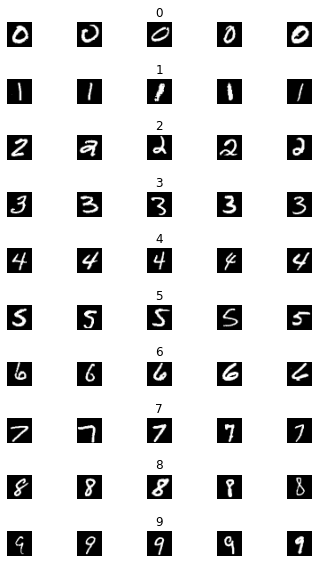

In [5]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
X_train = X_train/255
X_test = X_test/255


In [0]:
def le_Net_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
model = le_Net_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [11]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 1s 7ms/step - loss: 0.2227 - accuracy: 0.9279 - val_loss: 0.0776 - val_accuracy: 0.9765
Epoch 2/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.0463 - val_accuracy: 0.9865
Epoch 3/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0459 - val_accuracy: 0.9858
Epoch 4/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 5/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0353 - val_accuracy: 0.9895
Epoch 6/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 7/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 

Text(0.5, 0, 'epoch')

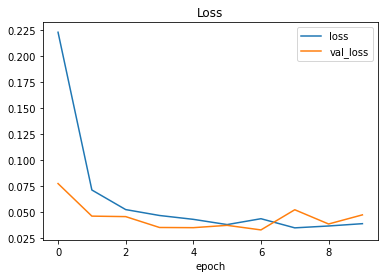

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

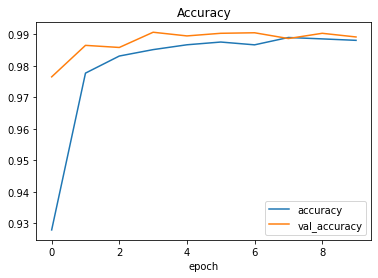

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

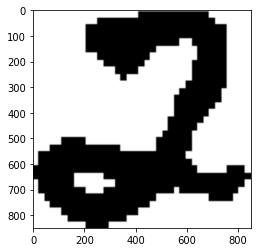

In [14]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

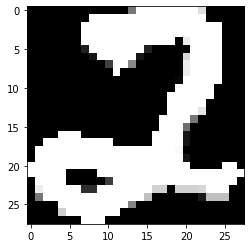

In [15]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [17]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [2]


In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.04566822573542595
Test accuracy: 0.9883999824523926


In [19]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)


(1, 24, 24, 30)
(1, 10, 10, 15)


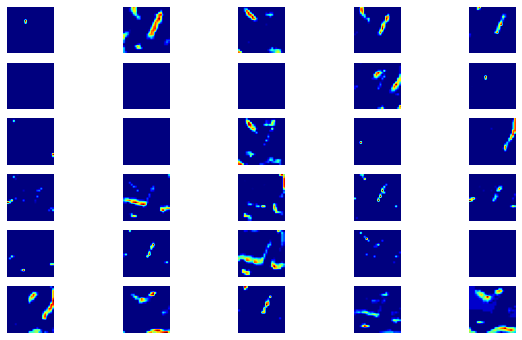

In [20]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

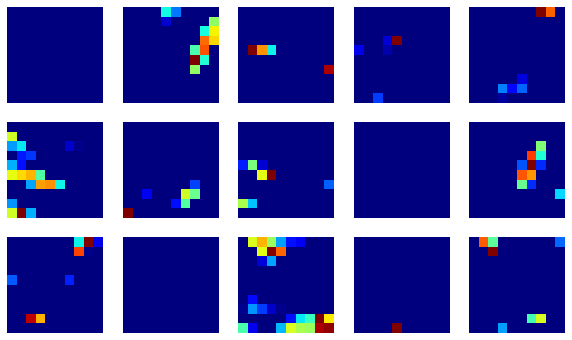

In [21]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')